# Generate GraphViz

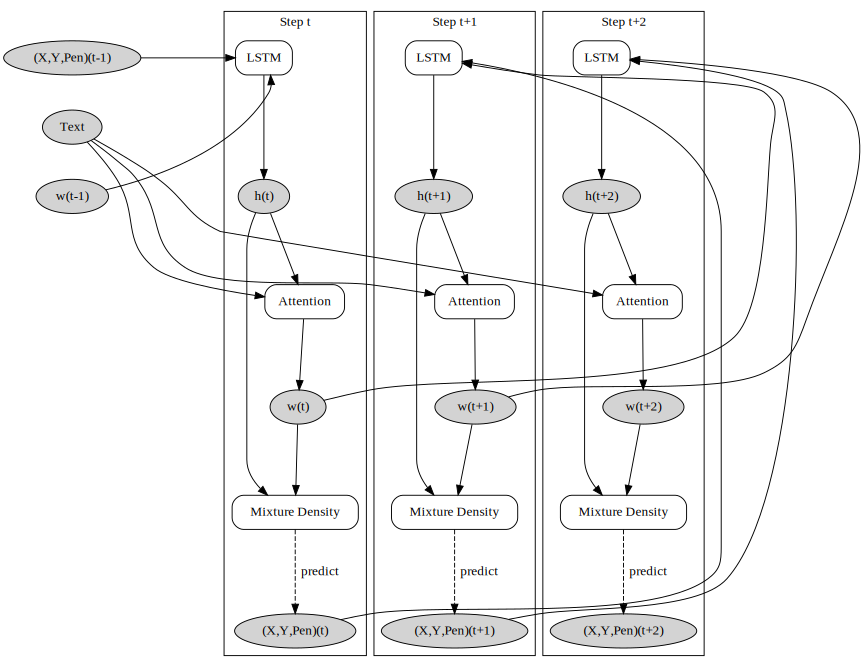

In [1]:
import graphviz
g = graphviz.Digraph(graph_attr=dict(size="12,12"))
with g.subgraph() as dot:
    g.node("pts(t-1)",label="(X,Y,Pen)(t-1)", shape="ellipse", style="filled")
    g.node("txt",label="Text", style="filled")
    g.node("w(t-1)", style="filled")
    g.edge("pts(t-1)","txt", style="invis")
    g.edge("txt","w(t-1)", style="invis")
for i,timestep in enumerate(["t","t+1", "t+2"]):
    with g.subgraph(name="cluster_{}".format(timestep)) as dot:
        dot.attr(label='Step {}'.format(timestep))
        dot.attr(sortv=str(i+1))
        dot.node("LSTM{}".format(timestep),label="LSTM", shape="box", style="rounded")
        dot.node("GMM{}".format(timestep),label="Mixture Density", shape="box", style="rounded")
        dot.node("ATT{}".format(timestep),label="Attention", shape="box", style="rounded")
        dot.node("pts({})".format(timestep),label="(X,Y,Pen)({})".format(timestep), shape="ellipse", style="filled")
        dot.node("h({})".format(timestep), shape="ellipse", style="filled")
        dot.node("w({})".format(timestep), shape="ellipse", style="filled")
        dot.edge("h({})".format(timestep), "ATT{}".format(timestep))
        dot.edge("LSTM{}".format(timestep),"h({})".format(timestep))
        dot.edge("h({})".format(timestep), "GMM{}".format(timestep))
        dot.edge("ATT{}".format(timestep), "w({})".format(timestep))
        dot.edge("w({})".format(timestep), "GMM{}".format(timestep))
        dot.edge("GMM{}".format(timestep), "pts({})".format(timestep), style="dashed", label="predict")


g.edge("pts(t-1)", "LSTMt", constraint="false")
g.edge("w(t-1)", "LSTMt", constraint="false")
g.edge("txt", "ATTt", constraint="false")
g.edge("txt", "ATTt+1", constraint="false")
g.edge("txt", "ATTt+2", constraint="false")
g.edge("w(t)","LSTMt+1",constraint="false")
g.edge("w(t+1)","LSTMt+2",constraint="false")
g.edge("pts(t)","LSTMt+1",constraint="false")
g.edge("pts(t+1)","LSTMt+2",constraint="false")
g